In [1]:
import networkx as nx

## Problème 1 : graphe eulérien

Il y a ici 4 quartiers :
- le quartier Nord
- le quartier Sud
- le quartier Est
- le quartier Kneiphof

Le quartier Nord est relié par 2 ponts au quartier Kneiphof, idem entre Kneiphof et Sud. Et il existe un pont entre le quartier Est et Nord, Est et Kneiphof, Est et Sud.

On modélise la ville de la façon suivante :
- chaque quartier de la ville séparé par un pont est représenté par un sommet du graphe
- il existe une arête entre deux sommets s'il existe un pont reliant ces sommets

On choisit ici un graphe non orienté car rien n'est connu sur le sens de circulation sur les ponts. On suppose donc qu'on y circule dans les deux sens.

In [2]:
konigsberg = nx.Graph([('Est','Sud'),('Est','Nord'),('Est','Kneiphof'),('Nord','Kneiphof'),('Kneiphof','Sud')])

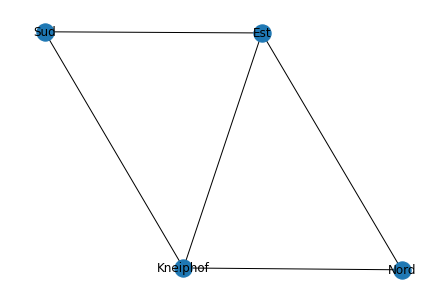

In [3]:
nx.draw(konigsberg,with_labels=True)

Un chemin passant par tous les ponts une et une seule fois à partir d'un quartier et revenant à son quartier d'origine équivaut à la recherche d'un cycle empruntant toutes les arêtes une et une seule fois.

C'est un **cycle eulerien**. On dit qu'**un graphe est eulérien** s'il possède un cycle eulérien.

In [4]:
nx.is_eulerian(konigsberg)

False

Donc il n'existe pas de tel chemin.

*Remarques.* Une condition nécessaire et suffisante pour qu'un graphe soit eulérien : s’il est connexe et si tous ses sommets sont de degré pair. Si il existe un chemin eulérien, mais pas un cycle, le graphe est dit semi-eulérien.

## Problème 2 : plus court chemin

In [5]:
DICO = ["aime", "auge", "baie", "brie", "bris", "bure", "cage", "cale", "came", "cape",
        "cime", "cire", "cris", "cure", "dame", "dime", "dire", "ducs", "dues", "duos",
        "dure", "durs", "fart", "fors", "gage", "gaie", "gais", "gale", "gare", "gars",
        "gris", "haie", "hale", "hors", "hure", "iris", "juge", "jure", "kart", "laie",
        "lame", "lime", "lire", "loge", "luge", "mage", "maie", "male", "mare", "mari",
        "mars", "mere", "mers", "mime", "mire", "mors", "muet", "mure", "murs", "nage",
        "orge", "ours", "page", "paie", "pale", "pame", "pane", "pape", "pare", "pari",
        "part", "paru", "pere", "pers", "pipe", "pire", "pore", "prie", "pris", "pues",
        "purs", "rage", "raie", "rale", "rame", "rape", "rare", "rime", "rire", "sage",
        "saie", "sale", "sape", "sari", "scie", "sure", "taie", "tale", "tape", "tare",
        "tari", "tige", "toge", "tore", "tors", "tort", "trie", "tris", "troc", "truc"]


In [6]:
def distance(w1,w2):
    s1 = sorted(w1)
    s2 = sorted(w2)
    #print(s1,s2)
    i1 = 0
    i2 = 0
    l = len(w1)
    id = 0
    while i1 < l and i2 < l:
        if s1[i1] == s2[i2]:
            i1 += 1
            i2 += 1
            id += 1
        elif s1[i1] < s2[i2]:
            i1 += 1
        else:
            i2 += 1
    #print(l,i1,i2,id)
    return l - id
        
def mots_a_distance_un(l,w):
    r = []
    for v in l :
        if distance(w,v) == 1:
            r.append(v)  
    return r

In [7]:
distance('ours','duos')

1

In [8]:
distance('ours','ours')

0

In [9]:
distance('ours','ducs')

2

In [10]:
mots_a_distance_un(DICO,'ours')

['duos', 'durs', 'fors', 'hors', 'mors', 'murs', 'purs', 'sure', 'tors']

In [11]:
def color(n,result):
    if n =='ours':
        return 'green'
    if n == 'cage':
        return 'red'
    if n in result:
        return 'yellow'
    return 'white'

On propose de procéder ainsi : je regarde les mots à distance 1 de `ours`, que je nomme les voisins. 

In [12]:
oursencage = nx.Graph()
w = 'ours'
result = ['ours']
neighbors = mots_a_distance_un(DICO,w)
print(neighbors)
for v in neighbors:
    oursencage.add_edge(w,v)

['duos', 'durs', 'fors', 'hors', 'mors', 'murs', 'purs', 'sure', 'tors']


In [13]:
nx.draw(oursencage,with_labels=True,node_color=[color(n,result) for n in oursencage.nodes()])

Puis, pour le premier voisin, je reproduis le même calcul.

In [14]:
w = neighbors[0]
result.append(w)
neighbors = mots_a_distance_un(DICO,w)
print(neighbors)
for v in neighbors:
    oursencage.add_edge(w,v)

['ducs', 'dues', 'durs', 'ours']


In [15]:
nx.draw(oursencage,with_labels=True,node_color=[color(n,result) for n in oursencage.nodes()])

Encore une fois.

In [16]:
w = neighbors[0]
result.append(w)
neighbors = mots_a_distance_un(DICO,w)
print(neighbors)
for v in neighbors:
    oursencage.add_edge(w,v)

['dues', 'duos', 'durs']


In [17]:
nx.draw(oursencage,with_labels=True,node_color=[color(n,result) for n in oursencage.nodes()])

Et puis une autre, j'espère trouver `cage` bientôt ...

In [18]:
w = neighbors[0]
result.append(w)
neighbors = mots_a_distance_un(DICO,w)
print(neighbors)
for v in neighbors:
    oursencage.add_edge(w,v)

['ducs', 'duos', 'dure', 'durs', 'pues', 'sure']


In [19]:
nx.draw(oursencage,with_labels=True,node_color=[color(n,result) for n in oursencage.nodes()])

Comme `ducs`et `duos`on déjà été explorés, je passe à `dure` ...

In [20]:
w = neighbors[2]
result.append(w)
neighbors = mots_a_distance_un(DICO,w)
print(neighbors)
for v in neighbors:
    oursencage.add_edge(w,v)

['bure', 'cure', 'dire', 'dues', 'durs', 'hure', 'jure', 'mure', 'sure']


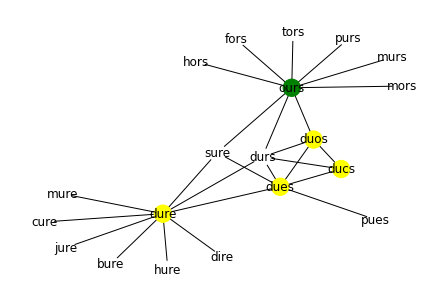

In [21]:
nx.draw(oursencage,with_labels=True,node_color=[color(n,result) for n in oursencage.nodes()])

In [22]:
w = neighbors[0]
result.append(w)
neighbors = mots_a_distance_un(DICO,w)
print(neighbors)
for v in neighbors:
    oursencage.add_edge(w,v)

['brie', 'cure', 'dure', 'hure', 'jure', 'mure', 'sure']


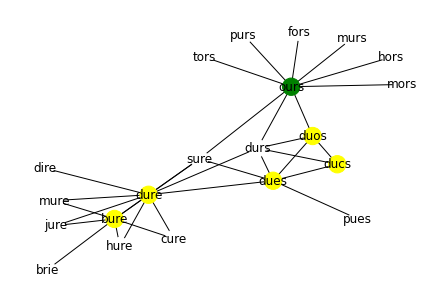

In [23]:
nx.draw(oursencage,with_labels=True,node_color=[color(n,result) for n in oursencage.nodes()])

In [24]:
w = neighbors[0]
result.append(w)
neighbors = mots_a_distance_un(DICO,w)
print(neighbors)
for v in neighbors:
    oursencage.add_edge(w,v)

['baie', 'bris', 'bure', 'cire', 'dire', 'lire', 'mire', 'pire', 'prie', 'raie', 'rime', 'rire', 'trie']


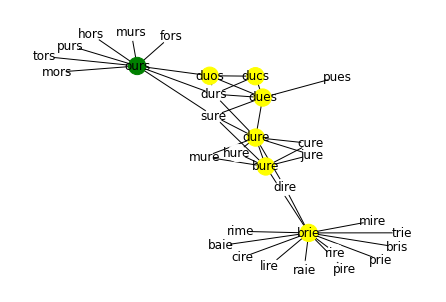

In [25]:
nx.draw(oursencage,with_labels=True,node_color=[color(n,result) for n in oursencage.nodes()])

In [26]:
w = neighbors[0]
result.append(w)
neighbors = mots_a_distance_un(DICO,w)
print(neighbors)
for v in neighbors:
    oursencage.add_edge(w,v)

['aime', 'brie', 'gaie', 'haie', 'laie', 'maie', 'paie', 'raie', 'saie', 'taie']


In [27]:
nx.draw(oursencage,with_labels=True,node_color=[color(n,result) for n in oursencage.nodes()])

In [28]:
w = neighbors[0]
result.append(w)
neighbors = mots_a_distance_un(DICO,w)
print(neighbors)
for v in neighbors:
    oursencage.add_edge(w,v)

['baie', 'came', 'cime', 'dame', 'dime', 'gaie', 'haie', 'laie', 'lame', 'lime', 'mage', 'male', 'mare', 'mari', 'mime', 'mire', 'paie', 'pame', 'raie', 'rame', 'rime', 'saie', 'taie']


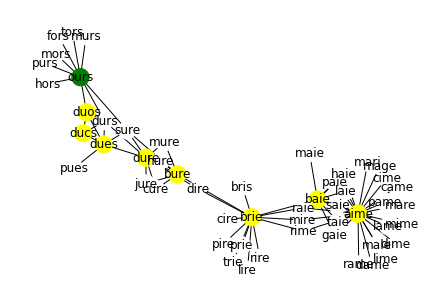

In [29]:
nx.draw(oursencage,with_labels=True,node_color=[color(n,result) for n in oursencage.nodes()])

In [30]:
w = neighbors[1]
result.append(w)
neighbors = mots_a_distance_un(DICO,w)
print(neighbors)
for v in neighbors:
    oursencage.add_edge(w,v)

['aime', 'cage', 'cale', 'cape', 'cime', 'dame', 'lame', 'mage', 'maie', 'male', 'mare', 'pame', 'rame']


In [31]:
nx.draw(oursencage,with_labels=True,node_color=[color(n,result) for n in oursencage.nodes()])

In [32]:
w = neighbors[1]
result.append(w)

Il m'a fallu 10 étapes pour trouver `cage` à partir de `ours`.

In [33]:
print(result)

['ours', 'duos', 'ducs', 'dues', 'dure', 'bure', 'brie', 'baie', 'aime', 'came', 'cage']


Pour réaliser cela, j'ai fait un **parcours en profondeur** : à chaque étape j'explore le premier mot (premier sommet voisin) qui n'a pas encore été exploré.

Est-ce que je peux trouver une liste de plus faible longueur ?

Dans ce cas, je fais une recherche de plus court chemin. Il faut construire tout le graphe.

In [34]:
g = nx.Graph()
for w in DICO:
    for v in mots_a_distance_un(DICO,w):
        g.add_edge(w,v)

In [35]:
result = ['ours','cage']

Puis appliquer un algorithme de calcul de plus court chemin (comme Dijkstra).

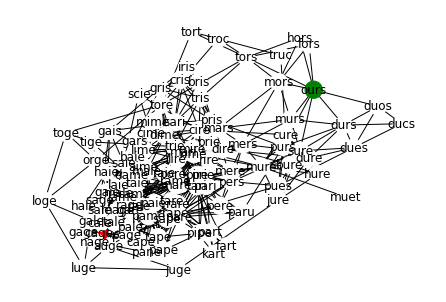

In [36]:
nx.draw(g,with_labels=True,node_color=[color(n,result) for n in g.nodes()])

In [37]:
nx.shortest_path(g,'ours','cage')

['ours', 'mors', 'mars', 'gars', 'gare', 'cage']

## Problème 3 : couplage maximum

On cherche ici à former des binômes parlant la même langue. Il faut donc modéliser les données de sorte que deux personnes parlant la même langue soient reliées. 

Assez naturellement on va modéliser les données sous la forme d'un graphe non orienté :
- un sommet représentera une personne
- une arête reliera deux personnes si elles parlent la même langue

Le problème s'exprime alors comme sélectionner un maximum d'arêtes sans sélectionner deux arêtes incidentes à un même sommet.

C'est un problème de **couplage maximum**.

In [38]:
langues = nx.Graph([('A','H'),('A','C'),('A','F'),('A','G'),('A','I'),\
                    ('B','D'),('B','K'),('B','C'),('B','H'),\
                    ('C','F'),('C','G'),('C','I'),('C','H'),\
                    ('D','K'),\
                    ('E','F'),('E','G'),('E','J'),('E','K'),\
                    ('F','G'),('F','J'),('F','K'),('F','G'),('F','I'),('F','I'),('F','L'),\
                    ('G','J'),('G','K'),('G','I'),\
                    ('H','J'),\
                    ('I','L'),\
                    ('J','K')\
                    ])

In [39]:
nx.draw(langues,with_labels=True)

In [40]:
nx.maximal_matching(langues)

{('A', 'H'), ('C', 'B'), ('D', 'K'), ('F', 'E'), ('G', 'J'), ('I', 'L')}

## Problème 4 : arbre couvrant de poids minimum

La modélisation des données est ici aussi naturelle. On construit un graphe non orienté tel que :
- chaque maison est représentée par un sommet ;
- deux maisons voisines sont reliées par une arête ;
- on affecte à l'arête un poids égal au coût de construction de la route entre les deux maisons

Il faut alors sélectionner un ensemble d'arêtes tel que la somme des arêtes est minimale et, tel que le sous graphe induit par ces arêtes est connexe (on peut accéder à tout sommet à partir de n'importe quel autre). C'est ce qu'on appelle un **arbre couvrant de poids minimal**.

On peut calculer des arbres couvrants grâce à des parcours.

Un algorithme pour réaliser cela est l'algorithme de Prim.

In [41]:
ville = nx.Graph()
ville.add_weighted_edges_from([(0,1,5),(0,2,3),(0,4,4),\
                         (1,2,3),(1,3,3),(1,5,2),(1,7,4),\
                         (2,4,5),(2,6,4),(2,5,3),\
                         (3,7,2),\
                         (4,8,2),(4,6,4),\
                         (5,6,4),(5,7,3),\
                         (6,8,3),(6,9,2),\
                         (7,9,4),\
                         (8,9,3)])

In [42]:
nx.draw(ville,with_labels=True)

In [43]:
t = nx.minimum_spanning_tree(ville)

In [44]:
sorted(t.edges(data=True))

[(0, 2, {'weight': 3}),
 (0, 4, {'weight': 4}),
 (1, 2, {'weight': 3}),
 (1, 3, {'weight': 3}),
 (1, 5, {'weight': 2}),
 (3, 7, {'weight': 2}),
 (4, 8, {'weight': 2}),
 (6, 8, {'weight': 3}),
 (6, 9, {'weight': 2})]

In [45]:
w = 0
for x,y,d in sorted(t.edges(data=True)):
    w = w + d['weight']
w

24

![Solutions](ville-boueuse-solutions.png)

## Problème 5 : flot maximum dans un graphe biparti

Assez naturellement nous allons modéliser les patients et les hôpitaux par des sommets d'un graphe et établir une arête entre deux sommets si le patient $x$ peut être dirigé vers l'hôpital $y$. On a donc une partition des sommets en deux, et il n'existe pas d'arête entre deux sommets d'une partition : c'est un **graphe biparti**.

Pour fixer les idées, on peut considérer les chiffres suivants :
- 3 hopitaux
- 6 blessés
  - le 1er peut être acheminé vers les hôpitaux 1 et 2
  - le 2eme peut être acheminé vers l'hôpital 1
  - le 3ème peut être acheminé vers tous les hôpitaux
  - le 4ème peut être acheminé vers l'hôpital 2
  - le 5ème peut être acheminé vers l'hôpital 2
  - le 6ème peut être acheminé vers les hôpitaux 2 et 3

In [46]:
evacuation = nx.Graph([('p1','h1'),('p1','h3'),\
                   ('p2','h1'),\
                    ('p3','h1'),('p3','h2'),('p3','h3'),\
                    ('p4','h2'),\
                    ('p5','h2'),\
                    ('p6','h2'),('p6','h3')])

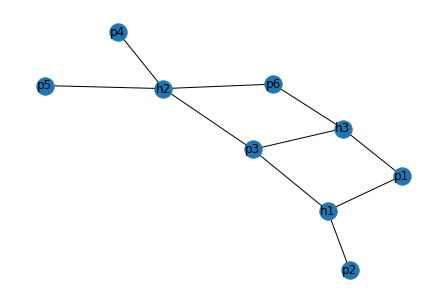

In [47]:
nx.draw(evacuation,with_labels=True)

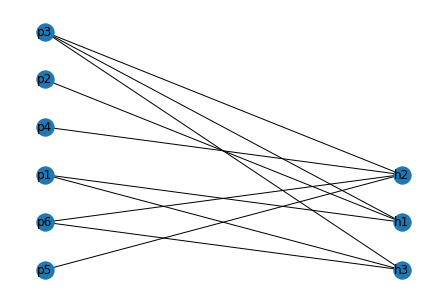

In [48]:
X, Y = nx.bipartite.sets(evacuation)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(evacuation,with_labels=True,pos=pos)

On pourrait ici croire que nous sommes dans une modélisation d'un couplage maximal. Mais ce n'est pas le cas car je peux sélectionner plusieurs arêtes incidentes à un sommet représentant un hôpital.

Comment modéliser que l'hôpital $h$ peut accueillir au maximum $n_h$ blessés ?

Il faudrait ajouter une contrainte sur les sommets représentants les hôpitaux qui indique la limite de capacité. Et sélectionner au maximum $n_h$ arêtes incidentes au sommet représentant l'hôpital $h$.

On peut voir les choses autrement :
- chaque blessé dispose d'un jeton
- le jeton du blessé doit aller dans un des hôpitaux vers lequel il peut être dirigé
- l'hôpital $h$ accepte au maximum $n_h$ jetons

In [49]:
nx.set_edge_attributes(evacuation, values = 1, name = 'capacity')

In [50]:
labels = nx.get_edge_attributes(evacuation, 'capacity')
nx.draw(evacuation,with_labels=True,pos=pos)
nx.draw_networkx_edge_labels(evacuation,pos,edge_labels=labels)

{('p1', 'h1'): Text(1.5, 1.5, '1'),
 ('p1', 'h3'): Text(1.5, 1.0, '1'),
 ('h1', 'p2'): Text(1.5, 2.5, '1'),
 ('h1', 'p3'): Text(1.5, 3.0, '1'),
 ('h3', 'p3'): Text(1.5, 2.5, '1'),
 ('h3', 'p6'): Text(1.5, 0.5, '1'),
 ('p3', 'h2'): Text(1.5, 3.5, '1'),
 ('h2', 'p4'): Text(1.5, 2.5, '1'),
 ('h2', 'p5'): Text(1.5, 1.0, '1'),
 ('h2', 'p6'): Text(1.5, 1.5, '1')}

Pour contrôler les jetons acceptables dans un hôpital, on ajoute un sommet $t$ auquel tous les hôpitaux sont reliés et on attribue aux arêtes un poids correspondant.

{('p1', 'h1'): Text(1.5, 1.5, '1'),
 ('p1', 'h3'): Text(1.5, 1.0, '1'),
 ('h1', 'p2'): Text(1.5, 2.5, '1'),
 ('h1', 'p3'): Text(1.5, 3.0, '1'),
 ('h1', 't'): Text(2.5, 0.5, '2'),
 ('h3', 'p3'): Text(1.5, 2.5, '1'),
 ('h3', 'p6'): Text(1.5, 0.5, '1'),
 ('h3', 't'): Text(2.5, 0.0, '1'),
 ('p3', 'h2'): Text(1.5, 3.5, '1'),
 ('h2', 'p4'): Text(1.5, 2.5, '1'),
 ('h2', 'p5'): Text(1.5, 1.0, '1'),
 ('h2', 'p6'): Text(1.5, 1.5, '1'),
 ('h2', 't'): Text(2.5, 1.0, '3')}

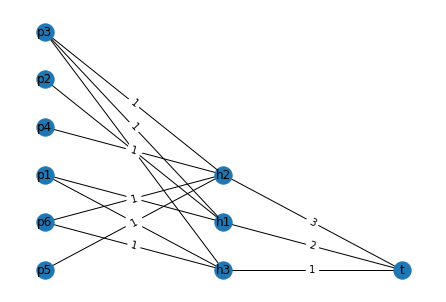

In [51]:
evacuation.add_node('t')
evacuation.add_edge('h1','t',capacity=2)
evacuation.add_edge('h2','t',capacity=3)
evacuation.add_edge('h3','t',capacity=1)
pos['t'] = (3,0)
labels = nx.get_edge_attributes(evacuation, 'capacity')
nx.draw(evacuation,with_labels=True,pos=pos)
nx.draw_networkx_edge_labels(evacuation,pos,edge_labels=labels)

Pour finaliser la modélisation, on ajoute un sommet $s$ reliant tous les blessés. Le poids des arêtes est de 1.

In [52]:
evacuation.add_node('s')
for i in range(1,7):
    evacuation.add_edge('s','p'+str(i),capacity=1)
pos['s'] = (0,0)

{('p1', 'h1'): Text(1.5, 1.5, '1'),
 ('p1', 'h3'): Text(1.5, 1.0, '1'),
 ('p1', 's'): Text(0.5, 1.0, '1'),
 ('h1', 'p2'): Text(1.5, 2.5, '1'),
 ('h1', 'p3'): Text(1.5, 3.0, '1'),
 ('h1', 't'): Text(2.5, 0.5, '2'),
 ('h3', 'p3'): Text(1.5, 2.5, '1'),
 ('h3', 'p6'): Text(1.5, 0.5, '1'),
 ('h3', 't'): Text(2.5, 0.0, '1'),
 ('p2', 's'): Text(0.5, 2.0, '1'),
 ('p3', 'h2'): Text(1.5, 3.5, '1'),
 ('p3', 's'): Text(0.5, 2.5, '1'),
 ('h2', 'p4'): Text(1.5, 2.5, '1'),
 ('h2', 'p5'): Text(1.5, 1.0, '1'),
 ('h2', 'p6'): Text(1.5, 1.5, '1'),
 ('h2', 't'): Text(2.5, 1.0, '3'),
 ('p4', 's'): Text(0.5, 1.5, '1'),
 ('p5', 's'): Text(0.5, 0.0, '1'),
 ('p6', 's'): Text(0.5, 0.5, '1')}

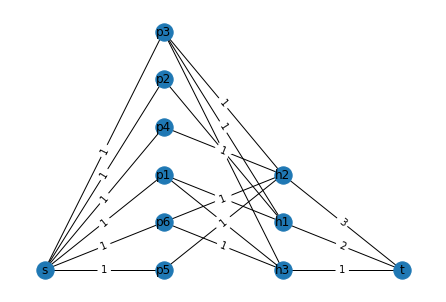

In [53]:
labels = nx.get_edge_attributes(evacuation, 'capacity')
nx.draw(evacuation,with_labels=True,pos=pos)
nx.draw_networkx_edge_labels(evacuation,pos,edge_labels=labels)

On s'est maintenant ramené à un **problème de flot**. Comment écouler tous les jetons, il y en a autant qu'il y a de blessés, à partir de $s$, jusque $t$. Les poids qu'on a ajouté sur les arêtes indiquent la capacité, i.e. le nombre de jetons maximal qu'on peut atteindre. On cherche donc ici le **flot maximal** : comment maximiser le nombre de jetons voyageant dans le réseau. 

In [54]:
nx.maximum_flow(evacuation,'s','t')

(6,
 {'p1': {'h1': 1, 'h3': 0, 's': 0},
  'h1': {'p1': 0, 'p2': 0, 'p3': 0, 't': 2},
  'h3': {'p1': 0, 'p3': 0, 'p6': 0, 't': 1},
  'p2': {'h1': 1, 's': 0},
  'p3': {'h1': 0, 'h2': 1, 'h3': 0, 's': 0},
  'h2': {'p3': 0, 'p4': 0, 'p5': 0, 'p6': 0, 't': 3},
  'p4': {'h2': 1, 's': 0},
  'p5': {'h2': 1, 's': 0},
  'p6': {'h2': 0, 'h3': 1, 's': 0},
  't': {'h1': 0, 'h2': 0, 'h3': 0},
  's': {'p1': 1, 'p2': 1, 'p3': 1, 'p4': 1, 'p5': 1, 'p6': 1}})

Note : une manière de calculer un couplage maximal c'est de modéliser le problème de couplage dans un problème de flot.

## Problème 6 : coloration de graphe

Regardons ce qui se passerait si personne n'avait menti.

Supposons que l'attribution des ateliers soit la suivante :

|   | Atelier 1 | Atelier 2 | Atelier 3 |
|---|-----------|-----------|-----------|
| A | x | | |
| B | | x | |
| C | | | x|
| D | x | | |
| E | | x | |
| F| | | x|
| G | | | x|


In [55]:
atelier = nx.Graph([('A','D'),('B','E'),('C','F'),('C','G'),('F','G')])

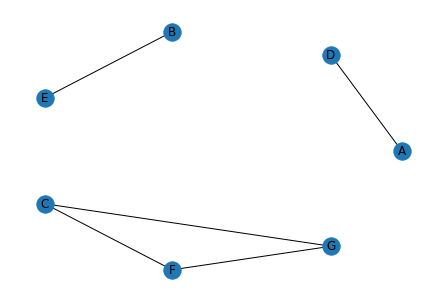

In [56]:
nx.draw(atelier,with_labels=True,pos=nx.circular_layout(atelier))

### Comment vérifier que A et D étaient ensemble ?

Comme ils refusent de dire avec qui ils étaient, on peut demander avec qui ils n'étaient pas.
Les réponses possibles figurent parmi les arêtes du graphe complémentaire. 

In [57]:
complement = nx.complement(atelier)

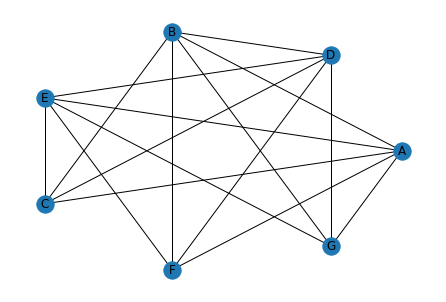

In [58]:
nx.draw(complement,with_labels=True,pos=nx.circular_layout(complement))

Il suffirait donc de vérifier si les réponses données par les prisonniers sont dans ce graphe complémentaire.

Malheureusement, comme on ne dispose pas de la liste attendue dans chaque atelier, on ne peut pas construire ce graphe complémentaire.


Néanmoins les réponses fournies par les prisonniers nous donnent une partie de ce graphe. Et si un prisonnier a menti il y a une arête qui ne devrait pas exister.

### Comment trouver cette arête ?

Si les prisonniers disent la vérité, aucun des prisonniers qu'ils indiquent n'était dans le même atelier.

En conséquence on peut attribuer à chaque sommet (à chaque prisonnier) un numéro d'atelier. Et deux sommets (deux prisonniers) reliés par une arête (donc n'était théoriquement pas dans le même atelier) ne doivent pas avoir le même numéro d'atelier.

Il suffit donc d'essayer d'attribuer un numéro à chaque sommet de telle sorte que deux sommets adjacents n'aient pas le même numéro. On réalise une **coloration de graphe**. Si on arrive à colorier avec $k$ couleurs on parle de **$k$-coloration**. Obtenir une coloration de telle sorte que deux sommets adjacents à une même arête n'aient pas la même couleur est une **coloration propre**. 

Dans notre cas, comme il y a 3 ateliers, 3 couleurs devraient suffire à avoir une coloration propre.

|  | N'était pas avec |
|--|--|
| A | G & F |
| B | A & C |
| C | A & E |
| D | B & C |
| E | F & D |
| F | G & D |
| G | E & F |

In [59]:
prison = nx.Graph([('A','G'),('A','F'),\
                   ('B','A'),('B','C'),\
                   ('C','A'),('C','E'),\
                   ('D','C'),('D','B'),\
                   ('E','F'),('E','D'),\
                   ('F','G'),('F','D'),\
                   ('G','F'),('G','E')])

In [60]:
nx.draw(prison,with_labels=True,pos=nx.circular_layout(prison))

In [61]:
nx.coloring.greedy_color(prison, strategy="independent_set")

{'D': 0, 'G': 0, 'E': 1, 'A': 1, 'B': 2, 'F': 2, 'C': 3}

In [62]:
prison = nx.Graph()
N = 7
for i in range(1,N-1):
    prison.add_edge(i,i+1)
    prison.add_edge(i,i+2)
prison.add_edge(N-1,N)
prison.add_edge(N-1,1)
prison.add_edge(N,1)
prison.add_edge(N,2)

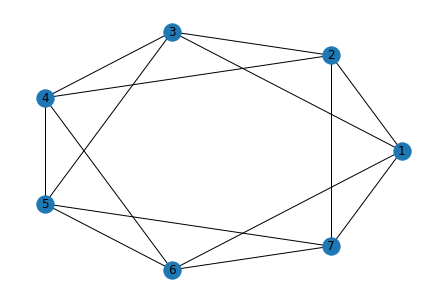

In [63]:
nx.draw(prison,with_labels=True,pos=nx.circular_layout(prison))

In [64]:
nx.coloring.greedy_color(prison, strategy="independent_set")

{1: 0, 4: 0, 2: 1, 5: 1, 3: 2, 6: 2, 7: 3}

On trouve ici une 4-coloration et on ne peut pas faire mieux. Chaque triangle (i,i+1,i+2) nécessite au moins 3 couleurs. La coloration de 7 impose que 7 a une couleur différente de 1, de 6, de 5. ce qui n'est pas possible sans avoir une quatrième couleur.

Note : un graphe biparti admet une 2-coloration propre.